# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to create new model images
## Step 1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
print('Before: \'%s\' \nAfter: \'%s\'' % (tDir,gm.validPath(tDir) ))
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

Before: '../targetDir' 
After: '/home/mbo2d/587722984435351614/'
Target Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'cmpMethod': 'correlation'},
 'imgArg': {'comment': 'Basic image '
                       'parameter file',
            'galaxy_centers': {'px': '513',
                               'py': '514',
                               'sx': '309',
                               'sy': '608'},
            'image_size': {'height': 1024,
                           'width': '1024'},
            'name': 'zoo_0',
            'target_id': '587722984435351614'},
 'name': 'zoo_0',
 'scoreType': 'target',
 'simArg': {'nPts': '100k',
            'name': '100k'},
 'targetName': 'zoo_0'}


Text(0.5, 1.0, 'Starting Target Image')

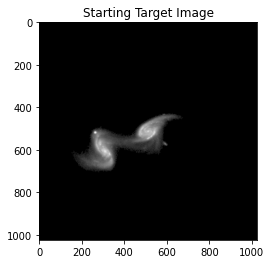

In [3]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")



___
## Step 4: Create a new image parameter


In [29]:
# Create a blank group score parameter and copy starting parameters
newName = 'zoo_test_3'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Demonstrating how to create a new image parameter'
new_params[newName]['imgArg']['comment'] = cmt

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 3000
new_params[newName]['imgArg']['image_size']['height'] = 2000

# If you want to change the galaxy centers
# Primary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['px'] = 250
new_params[newName]['imgArg']['galaxy_centers']['py'] = 250
# Secondary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['sx'] = 500
new_params[newName]['imgArg']['galaxy_centers']['sy'] = 500
# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
new_params[newName]['targetName'] = newName

# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = 1.5

# If you want to modify the radial brightness constant
pc = 2.5    # primary galaxy
sc = 1.5     #secondary galaxy
new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5
gm.pprint(new_params)

{'zoo_test_3': {'cmpArg': {'cmpMethod': 'correlation'},
                'imgArg': {'blur': {'size': 5,
                                    'type': 'gaussian_blur',
                                    'weight': 1.5},
                           'comment': 'Demonstrating '
                                      'how '
                                      'to '
                                      'create '
                                      'a '
                                      'new '
                                      'image '
                                      'parameter',
                           'galaxy_centers': {'px': 250,
                                              'py': 250,
                                              'sx': 500,
                                              'sy': 500},
                           'image_size': {'height': 2000,
                                          'width': 3000},
                           'name': 'zoo_test_3',
            

___
## Step 4.1
### Create a new target Image
If the size and centers were modified, then create a new target image to match the size and centers


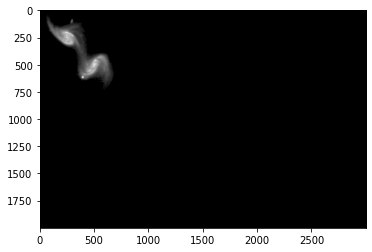

In [30]:
# Function in Image Creator that modifes
# exsiting target images to match new image

ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True )
# Grab new target image
tImg = tInfo.getTargetImage( newName )

if type(tImg) != type(None):
    plt.imshow( tImg, cmap='gray')

else:
    print("WARNING!  Target image not found")

___
## Step 5
### Test if SIMR pipeline can create the new model image!

In [31]:

# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.simr_run( rInfo=rInfo, arg = newImgArg )
rInfo.printScores(allScores=True)

IM: run_info_class.__init__
	 - runDir:  /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/
Run 'r00000' Good!
True
SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f23a670f040>
IC: image_creator_run
IC: rInfo.status:  True
MS: Run:    1 /    1
MS: target_image_compare: zoo_test_3
IM: run_info_class.printScores()
	 - run_id: r00000
	 - zoo_merger: 0.945946
	 - machine_scores: 3
	 - zoo_test: 0.419647
	 - zoo_0: 0.753202
	 - zoo_test_3: 0.828484


___
## Step 5.1
### View results for the new Model Image!

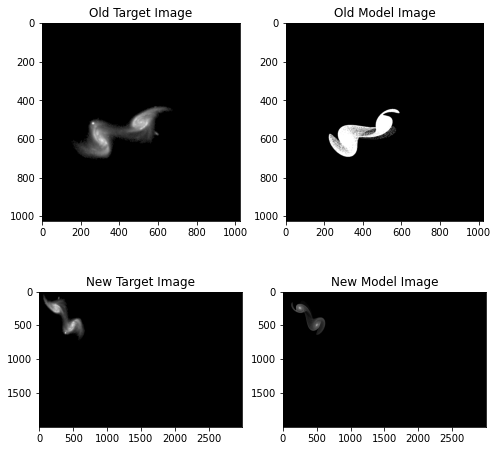

In [32]:
# View new model image next to target image
mImg = rInfo.getModelImg( newName )

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['targetName']), cmap='gray' )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( rInfo.getModelImg( old_param['imgArg']['name'] ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow(tImg,cmap='gray')

ax[1,1].set_title("New Model Image")
ax[1,1].imshow(mImg,cmap='gray')

___
## Step 6
### Save your new image parameters!

In [35]:
# Add to target image repository
tInfo.addImageParams( new_params )

# Or save to a location of your choosing
tInfoLoc = tInfo.get("infoDir")
imgParamLoc = '../param/' + 'zoo_test_3.json'
gm.saveJson( new_params, imgParamLoc )

***
## Step 7
### Go through all models and see if new image improves results!

In [37]:
# Define arguments for executing simr target
newScoreArg = gm.inArgClass( )
newScoreArg.setArg( 'scoreParams', new_params )  # Give new parameter
newScoreArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newScoreArg.setArg( 'newImage', True )  # Make true if you want new image
newScoreArg.setArg( 'newScore', True )  # Make true if you want new image
newScoreArg.setArg( 'overWrite', False )  # Make true if you need to overwrite

# Run through simr target image and score creation
simr.simr_target( tInfo = tInfo, arg = newScoreArg )


SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'Support_Code.info_module.target_info_class'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Runs needing scores: 1293
100.0% - 1293 / 1293	  






100.0% - 1293 / 1293	  








KeyError: "['zoo_test_3'] not in index"

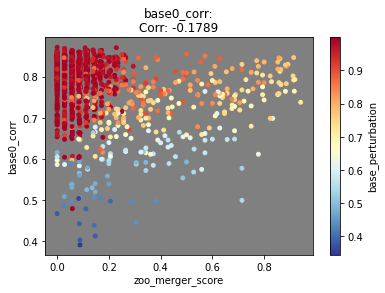

In [36]:
scores = tInfo.getScores()
#print(scores.columns)
#print(scores['zoo_test'])
#fig, ax = plt.subplots(1,2,figsize=(12,12))
sa.getNamedPlot(scores, sName='base0_corr' )
sa.getNamedPlot( scores, sName=newName )

SA: valid scores: 1288
      zoo_merger_score  base0_corr  base_perturbation
0             0.918919    0.793071           0.713520
1             0.941176    0.737633           0.716723
4             0.914286    0.791849           0.714464
5             0.916667    0.764586           0.689120
6             0.911765    0.801774           0.747388
...                ...         ...                ...
1288          0.000000    0.797219           0.954986
1289          0.000000    0.775788           0.992380
1290          0.000000    0.831271           0.993772
1291          0.000000    0.818303           0.948159
1292          0.000000    0.840964           0.976869

[1288 rows x 3 columns]


<AxesSubplot:title={'center':'base0_corr:\nCorr: -0.1789'}, xlabel='zoo_merger_score', ylabel='base0_corr'>

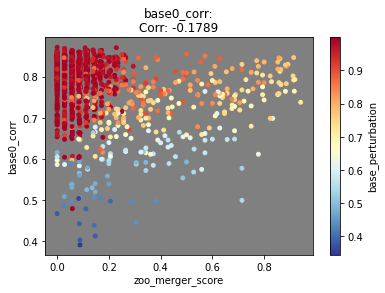

In [20]:

sa.getNamedPlot( scores, sName='base0_corr', printAll=True)

___
## Step 11: Add new function to direct_image_comparison.py

## Step 12: Rename parameter and save
- Create a new dict of the new score parameter
    - Parameter name
    - cmpMethod name: Match name of function in directory_image_compare
   

In [12]:
param = deepcopy( new_params['new_score'] )
param['name'] = 'base0_ssim'
param['cmpArg']['cmpMethod'] = 'ssim'

gm.pprint(param)

{'cmpArg': {'cmpMethod': 'ssim'},
 'imgArg': {'name': 'default',
            'pType': 'default'},
 'name': 'base0_ssim',
 'scoreType': 'target',
 'simArg': {'nPts': '100k',
            'name': '100k'},
 'targetName': 'zoo'}


___
## Step 13: Save in a score parameter file

In [13]:
# Load existing score parameter file
pLoc = gm.validPath('../param/base0.json')
print(pLoc,'\n')
baseParamClass = im.group_score_parameter_class(pLoc = pLoc)

#gm.pprint(baseParams)

# Add new score parameter to dict
baseParamClass.group[ param['name'] ] = param
gm.pprint(baseParamClass.group)
baseParamClass.saveParam( saveLoc = '../param/base0.json' )


/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/galaxyJSPAM/param/base0.json 

{'base0_bcorr0': {'cmpArg': {'cmpMethod': 'binary_correlation'},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr0',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr1': {'cmpArg': {'cmpMethod': 'binary_correlation',
                             'h1': 120,
                             'h2': 120},
                  'imgArg': {'name': 'default',
                             'pType': 'default'},
                  'name': 'base0_bcorr1',
                  'scoreType': 'target',
                  'simArg': {'nPts': '100k',
                             'name': '100k'},
                  'targetName': 'zoo'},
 'base0_bcorr2': {'cmpArg': {'cmpMethod': 'binary_correlation',
                          

___
## Step 14: Have target run the score parameter file you just updated

In [ ]:
newTarget = gm.inArgClass()
newTarget.setArg( 'tInfo', tInfo )
newTarget.setArg( 'scoreParams', baseParamClass.group )
newTarget.setArg( 'printAll', False )
newTarget.setArg( 'newScore', True )
#newTarget.setArg( 'overWrite', True )

#gm.pprint(newTarget.get('scoreParams'))

simr.simr_target( arg=newTarget )

SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'NoneType'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Runs needing scores: 1293
100.0% - 1293 / 1293	  



IM: Target.gatherRunInfos.
GM: Printing Input arguments
	- printBase - <class 'bool'> :  True
	- printAll - <class 'bool'> :  False
	- nProc - <class 'int'> :  -1
	- simple - <class 'bool'> :  False
	- runDir - <class 'NoneType'> :  None
	- sdssDir - <class 'NoneType'> :  None
	- targetDir - <class 'NoneType'> :  None
	- dataDir - <class 'NoneType'> :  None

0.2% - 3 / 1293	  
0.6% - 8 / 1293	  


___
## Step 15: view target results of new score function! Again!

In [ ]:
sco